In [1]:
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crash = pd.read_csv('./data/Crashes_in_DC_011019.csv', low_memory=False)

In [3]:
crash.columns

Index(['X', 'Y', 'OBJECTID', 'CRIMEID', 'CCN', 'REPORTDATE', 'ROUTEID',
       'MEASURE', 'OFFSET', 'STREETSEGID', 'ROADWAYSEGID', 'FROMDATE',
       'TODATE', 'MARID', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'XCOORD',
       'YCOORD', 'WARD', 'EVENTID', 'MAR_ADDRESS', 'MAR_SCORE',
       'MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST',
       'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST', 'MAJORINJURIES_DRIVER',
       'MINORINJURIES_DRIVER', 'UNKNOWNINJURIES_DRIVER', 'FATAL_DRIVER',
       'MAJORINJURIES_PEDESTRIAN', 'MINORINJURIES_PEDESTRIAN',
       'UNKNOWNINJURIES_PEDESTRIAN', 'FATAL_PEDESTRIAN', 'TOTAL_VEHICLES',
       'TOTAL_BICYCLES', 'TOTAL_PEDESTRIANS', 'PEDESTRIANSIMPAIRED',
       'BICYCLISTSIMPAIRED', 'DRIVERSIMPAIRED', 'TOTAL_TAXIS',
       'TOTAL_GOVERNMENT', 'SPEEDING_INVOLVED', 'NEARESTINTROUTEID',
       'NEARESTINTSTREETNAME', 'OFFINTERSECTION', 'INTAPPROACHDIRECTION',
       'LOCATIONERROR', 'LASTUPDATEDATE', 'MPDLATITUDE', 'MPDLONGITUDE',
       'MPDGEOX', 'MPD

In [4]:
crash.head()

,X,Y,OBJECTID,CRIMEID,CCN,REPORTDATE,ROUTEID,MEASURE,OFFSET,STREETSEGID,...,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY
0,-76.939271,38.881772,70955560,24641879,13085762,2013-06-22T05:00:00.000Z,13034382,0.000,0.000011,5696.0,...,13009362,ALABAMA AVE SE,0.850371,North,NaN,NaN,NaN,NaN,NaN,NaN
1,-77.021913,38.893898,70955561,25166168,14159941,2014-10-17T05:00:00.000Z,11000702,472.983,0.564892,6816.0,...,11048162,INDIANA AVE NW,1.568010,North,NaN,NaN,38.893890,-77.021904,NaN,NaN
2,-77.027739,38.954105,70955562,24641881,13086088,2013-06-23T19:14:00.000Z,11040042,4236.112,0.279638,4837.0,...,11048422,INGRAHAM ST NW,0.987787,North,NaN,NaN,38.954098,-77.027733,NaN,NaN
3,-77.056939,38.904600,70955563,25166173,14159465,2014-10-16T05:00:00.000Z,36001942,106.070,0.000000,-9.0,...,11069812,PENNSYLVANIA AVE NW,33.409623,Southwest,NaN,NaN,NaN,NaN,NaN,NaN
4,-77.050801,38.923507,70955564,25166174,14159077,2014-10-15T05:00:00.000Z,11020022,657.149,0.000000,4982.0,...,11094182,WOODLEY PL NW,46.373786,West,NaN,NaN,38.923265,-77.050828,NaN,NaN


In [5]:
crash['REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])

In [6]:
crash['REPORTDATE'].describe()

count                  196451
unique                 102431
top       2015-01-06 05:00:00
freq                       89
first     1975-05-26 05:00:00
last      2025-05-24 05:00:00
Name: REPORTDATE, dtype: object

In [7]:
crash['REPORTDATE'].nlargest()

101789   2025-05-24 05:00:00
197044   2019-01-09 05:17:17
197043   2019-01-09 04:45:53
197041   2019-01-09 04:29:09
197040   2019-01-09 04:28:16
Name: REPORTDATE, dtype: datetime64[ns]

In [8]:
ts = crash.set_index('REPORTDATE')

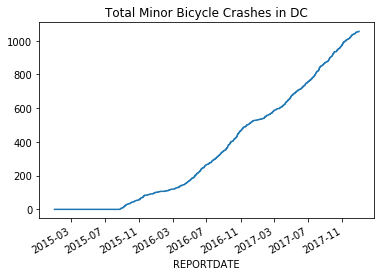

In [9]:
ts.sort_index()['MINORINJURIES_BICYCLIST']['2015':'2017'].cumsum().plot(title='Total Minor Bicycle Crashes in DC')

In [10]:
# major accidents
crash[crash['MAJORINJURIES_BICYCLIST'] > 0].shape[0]

255

In [11]:
# minor injuries
crash[crash['MINORINJURIES_BICYCLIST'] > 0].shape[0]

1670

In [12]:
# fatalities
crash[crash['FATAL_BICYCLIST'] > 0].shape[0]

10

## Plot all accidents

In [13]:
# data = crash[crash['MINORINJURIES_BICYCLIST'] > 0][['X', 'Y']].values

In [14]:
# m = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

In [15]:
# # add to map one-by-one
# for i in range(0,len(data)):
#     folium.Marker(location=[data[i][1], data[i][0]],
#                   icon=folium.Icon(color='red'),
                  
#                  ).add_to(m)

In [16]:
#m

## Plot by year

In [17]:
data = crash[crash['MINORINJURIES_BICYCLIST'] > 0][['X', 'Y']].values

In [18]:
data16 = ts['2016'][ts['2016']['MINORINJURIES_BICYCLIST'] > 0][['X', 'Y']].values

In [19]:
data17 = ts['2017'][ts['2017']['MINORINJURIES_BICYCLIST'] > 0][['X', 'Y']].values

In [20]:
data18 = ts['2018'][ts['2018']['MINORINJURIES_BICYCLIST'] > 0][['X', 'Y']].values

In [21]:
len(data16)

428

In [22]:
len(data17)

525

In [23]:
len(data18)

414

In [24]:
crash161718 = folium.Map(location=[38.9072, -77.0369], zoom_start=12)

In [25]:
# # add to map one-by-one
# for i in range(0,len(data16)):
#     folium.Marker(location=[data[i][1], data[i][0]],
#                   icon=folium.Icon(color='blue'),
#                   popup='2016',
#                  ).add_to(crash161718)

In [26]:
# add to map one-by-one
for i in range(0,len(data17)):
    folium.Marker(location=[data[i][1], data[i][0]],
                  icon=folium.Icon(color='red'),
                  popup='2017',
                 ).add_to(crash161718)

In [27]:
# add to map one-by-one
for i in range(0,len(data18)):
    folium.Marker(location=[data[i][1], data[i][0]],
                  icon=folium.Icon(color='green'),
                  popup='2018',
                 ).add_to(crash161718)

In [28]:
# crash161718

In [29]:
crash161718.save('./maps/bicycle-17-18-crashes.html')

## Totals by year

In [49]:
ts['2016'][ts['2016']['MINORINJURIES_BICYCLIST'] > 0].shape

(428, 53)

In [50]:
ts['2016'][ts['2016']['MAJORINJURIES_BICYCLIST'] > 0].shape

(51, 53)

In [52]:
ts['2016'][ts['2016']['FATAL_BICYCLIST'] > 0].shape

(1, 53)

In [54]:
ts['2017'][ts['2017']['MINORINJURIES_BICYCLIST'] > 0].shape

(525, 53)

In [55]:
ts['2017'][ts['2017']['MAJORINJURIES_BICYCLIST'] > 0].shape

(57, 53)

In [56]:
ts['2017'][ts['2017']['FATAL_BICYCLIST'] > 0].shape

(0, 53)

In [57]:
ts['2018'][ts['2018']['MINORINJURIES_BICYCLIST'] > 0].shape

(414, 53)

In [58]:
ts['2018'][ts['2018']['MAJORINJURIES_BICYCLIST'] > 0].shape

(45, 53)

In [59]:
ts['2018'][ts['2018']['FATAL_BICYCLIST'] > 0].shape

(3, 53)

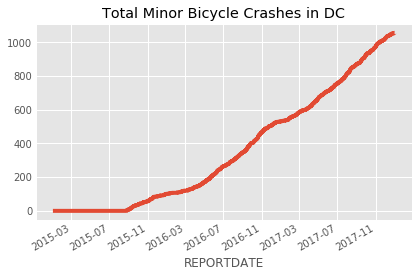

In [62]:
ts.sort_index()['MINORINJURIES_BICYCLIST']['2015':'2017'].cumsum().plot(title='Total Minor Bicycle Crashes in DC')

In [75]:
# ts.resample('D')[bike_columns].sum().plot()

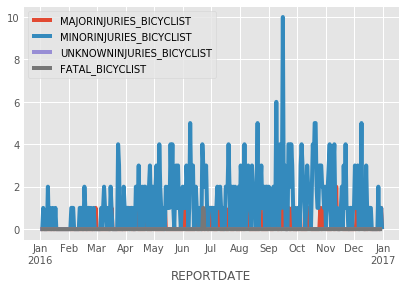

In [74]:
ts['2016'].resample('D')[bike_columns].sum().plot()

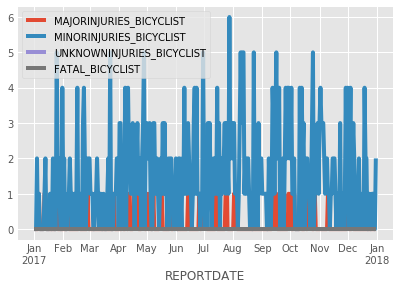

In [77]:
ts['2017'].resample('D')[bike_columns].sum().plot()

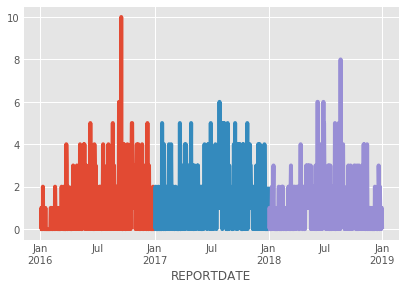

In [83]:
ts['2016'].resample('D')['MINORINJURIES_BICYCLIST'].sum().plot()
ts['2017'].resample('D')['MINORINJURIES_BICYCLIST'].sum().plot()
ts['2018'].resample('D')['MINORINJURIES_BICYCLIST'].sum().plot()
plt.savefig('./img/time_of_year.png', dpi=300, bbox_inches='tight')

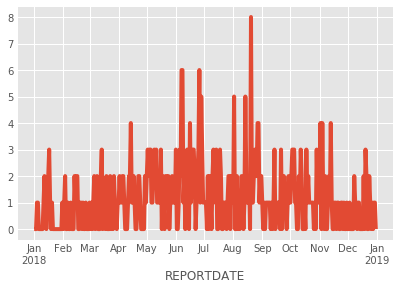

In [80]:
ts['2018'].resample('D')['MINORINJURIES_BICYCLIST'].sum().plot()

## Days of week analysis

In [31]:
bike_columns = ['MAJORINJURIES_BICYCLIST', 'MINORINJURIES_BICYCLIST', 'UNKNOWNINJURIES_BICYCLIST', 'FATAL_BICYCLIST']

In [32]:
crash[bike_columns].sum()

MAJORINJURIES_BICYCLIST       255
MINORINJURIES_BICYCLIST      1678
UNKNOWNINJURIES_BICYCLIST      15
FATAL_BICYCLIST                10
dtype: int64

In [33]:
bike_crash = crash[(crash['MAJORINJURIES_BICYCLIST'] > 0) | (crash['MINORINJURIES_BICYCLIST'] > 0) | (crash['FATAL_BICYCLIST'] > 0)]

In [34]:
# Monday is 0 and Sunday is 6
def get_weekday(timestamp):
    return timestamp.weekday()

In [35]:
def get_week_number(timestamp):
    return timestamp.isocalendar()[1]

In [36]:
bike_crash['WEEKDAY'] = bike_crash.apply(lambda row: get_weekday(row['REPORTDATE']), axis=1)

/Users/JosephNelson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
bike_crash['WEEK'] = bike_crash.apply(lambda row: get_week_number(row['REPORTDATE']), axis=1)

/Users/JosephNelson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
x_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

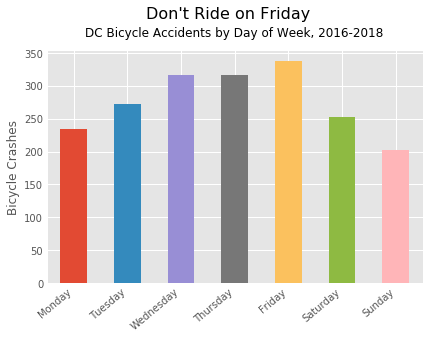

In [44]:
fig, ax = plt.subplots()
bike_crash.groupby([bike_crash.WEEKDAY])['REPORTDATE'].count().plot(kind='bar')
ax.set_xticklabels(x_labels, rotation=40, ha='right')
ax.set_xlabel('')
ax.set_ylabel('Bicycle Crashes', size=12)
plt.suptitle("Don't Ride on Friday", y=1.03, fontsize=16)
plt.title("DC Bicycle Accidents by Day of Week, 2016-2018", y=1.03, size=12)
plt.style.use('ggplot')
plt.savefig('./img/crashes_day-of_week_new.png', dpi=300, bbox_inches='tight')

In [96]:
def get_hour(datetime_info):
    return datetime_info.hour

In [98]:
bike_crash['hour'] = bike_crash['REPORTDATE'].apply(get_hour)

/Users/JosephNelson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
bike_crash['hour'].value_counts().head()

5     295
1     147
2     134
0     132
23    121
Name: hour, dtype: int64

In [104]:
ts['2018-12-07']

,X,Y,OBJECTID,CRIMEID,CCN,ROUTEID,MEASURE,OFFSET,STREETSEGID,ROADWAYSEGID,...,NEARESTINTROUTEID,NEARESTINTSTREETNAME,OFFINTERSECTION,INTAPPROACHDIRECTION,LOCATIONERROR,LASTUPDATEDATE,MPDLATITUDE,MPDLONGITUDE,MPDGEOX,MPDGEOY
REPORTDATE,,,,,,,,,,,,,,,,,,,,,
2018-12-07 00:40:55,-77.050114,38.902534,71146726,27881971,18207166,11050892,3558.513,0.291249,4361.0,4896.0,...,11091262,WASHINGTON CIR NW,48.562970,West,NaN,NaN,38.902952,-77.050653,395653.23,137187.19
2018-12-07 01:17:14,-77.020878,38.966977,71146727,27881987,18207133,47017472,51.480,15.415998,-9.0,24168.0,...,NaN,NaN,-999.000000,NaN,NaN,NaN,38.967108,-77.020875,398190.95,144355.04
2018-12-07 01:29:21,-77.027671,38.965394,71146728,27881996,18207265,11040042,5493.144,34.930714,468.0,714.0,...,11076242,RITTENHOUSE ST NW,46.920539,NaN,NaN,NaN,38.965363,-77.027575,397636.94,144161.43
2018-12-07 01:29:52,-77.014241,38.892047,71146729,27881997,18207122,15048463,4123.837,0.004854,5435.0,2444.0,...,11025352,CONSTITUTION AVE NW,59.489242,West,NaN,NaN,38.892609,-77.014364,398764.77,136021.66
2018-12-07 01:32:08,-77.006422,38.896876,71146730,27882001,18207230,12024732A,122.172,77.282064,15656.0,40059.0,...,12024732,COLUMBUS CIR NE,45.195056,West,NaN,NaN,38.896056,-77.005880,399463.98,136632.07
2018-12-07 01:47:09,-76.980680,38.847127,71146731,27882007,18207252,58022102,13.087,11.267918,-9.0,36080.0,...,13082352,STANTON RD SE,162.301712,West,NaN,NaN,38.846414,-76.982003,401681.01,131024.62
2018-12-07 01:53:30,-77.085636,38.938234,71146732,27882009,18207185,11063762,1207.181,0.000949,5648.0,7390.0,...,11090702,WARD CIR NW,1.429082,West,NaN,NaN,38.937586,-77.086169,392575.79,141152.18
2018-12-07 02:00:46,-77.003896,38.908602,71146733,27882012,18206458,12036722,509.715,26.410669,5265.0,13687.0,...,12064672,NEW YORK AVE NE,17.354859,West,NaN,NaN,38.909047,-77.004536,399674.91,137882.49
2018-12-07 04:53:56,-77.012676,38.884747,71146734,27882025,18207296,15048463,3287.919,0.000000,-9.0,22201.0,...,14047972,INDEPENDENCE AVE SW,53.919805,NaN,NaN,NaN,38.887409,-77.014654,398900.39,135211.35
